# Vježbe 2 - prvi dio

- Analiza zadaće
- Komentari, upiti, savjeti
- Primjer polinomne regresije
- Linearna regresija - drugačiji izbor funkcije pogreške

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.datasets import make_regression
import numpy.random as rng
import seaborn as sns
import time

## Analiza zadaće
---

## Zadatak 3
Neka su zadani ulazni podaci $X\in \mathbb{R}^{m\times n}$ i pripadne izlazne vrijednosti $y\in\mathbb{R}^{m}$. Na ovim podacima možemo provesti proces učenja modela linearne regresije. <br>
Znamo kako se učenje svodi na minimizaciju funkcije $J(\theta) = \frac{1}{2m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2$ te kako do rješenje tog minimizacijskog problema možemo doći gradijentnom metodom. <br>
Implementirajte gradijentnu metodu za učenje modela linearne regresije u općenitom slučaju kada su ulazni podaci dimenzije $X\in \mathbb{R}^{m\times n}$.<br>

Dodajte sljedeću mogućnost svojoj implementaciji gradijentne metode: crtanje grafa ovisnosti funkcije troška $J(\theta)$ o iteracijama. (U svakoj iteraciji spremite vrijednost funkcije troška)

In [3]:
## 4
# Gradijentna metoda
def gradientMethod(X,Y,alpha, numIter): 
    # Argumenti: X - matrica dizajna, Y-vektor izlaza, alpha - stopa ucenja, numIter - broj iteracija
    m = X.shape[0] # broj redaka/podataka
    n = X.shape[1] # broj stupaca/varijabli
    theta =  np.zeros((n,1)) # Kreiramo pocetni theta
    cost = np.zeros(numIter) # Trosak svake iteracije spremam u array kako bi poslije mogla plotati
    print("Gradient method staring ...")
    for i in range(numIter):
        XThetaY = X.dot(theta)-Y #Pomnozimo X i theta i oduzmemo Y
        gradJ = (X.T.dot(XThetaY))/m # Gradijent
        theta = theta - alpha*gradJ # Azuriramo theta
        
        cost[i] = (XThetaY.T).dot(XThetaY)/(2*m) # trosak spremimo
        if(i%10==0):
            print("Iteration #{} finished".format(i))
    return theta, cost

def predict(X,theta):
    y_pred = X.dot(theta)
    return y_pred

## Zadatak 4
U datoteci house_train.csv i house_test.csv su vam dani podaci o nekretninama, koji sadrže različite karakteristike nekretnina poput površine ili broja soba te cijenu. Cilj narednih zadataka će biti uspostaviti linearnu regresiju između različitih karakteristika kuće u svrhu predviđanja cijene nekretnine. 

Kao ulaznu varijablu uzmite sqft_living, a kao izlaznu varijablu price. 

1. Učitajte podatke koji su vam dani u datoteci *house_train.csv*. Skalirajte podatke koristeći metodu objašnjenu na sljedećem [linku](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale) 

1. Koristeći proizvoljnu biblioteku vizualizirajte odnos varijable ulaznih i izlaznih podataka. 

1. Koristeći *numpy array* napravite matricu dizajna $X\in \mathbb{R}^{m\times (n+1)}$ i vektor izlaznih podataka $y \in \mathbb{R}^{m}$. 

1. Pokrenite gradijentnu metodu koju ste implementirali u prethodnom zadatku i pomoću nje odredite parametre $\theta_0$ i $\theta_1$. (Stopu učenja i broj iteracija odredite sami)

1. Pravac određen izračunatime  parametrima $\theta_0 + \theta_1 x$ prikažite na grafu iz podzadatka b).
1. Nacrtajte  graf promjene funkcije troška $J(\theta)$ kroz iteracije.
1. Učitajte podatke iz datoteke *house_test.csv*, spremite ih u odgovarajuće *numpy arrays* $X_{test}$ i $y_{test}$. Kao u podzadatku b), prikažite ih grafički.  

1. Na učitanim podacima za testiranje provedite testiranje vašeg modela kao što smo pokazali na vježbama. Ispišite vrijednost pogreške.

8. Za podatke $X$ i $y$ učitane iz datoteke *house\_train.csv* odredite opet parametre $\theta_0, \theta_1$, ali koristeći gotovu implementaciju iz [*sklearn*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html}{sklearn.LinearRegression) biblioteke. (Pazite na dimenzije)

1. Na učitanim podacima za testiranje provedite testiranje ovog modela kao što smo pokazali na vježbama. Ispišite vrijednost pogreške.

1. Razlikuju li se model kojeg ste dobili koristeći vašu implementaciju gradijentne metode i model kojeg ste dobili koristeći gotovu implementaciju iz *scikit-learn* paketa? 

1. Za podatke $X$ i $Y$ učitane iz datoteke *house_train.csv* odredite opet parametre $\theta_0, \theta_1$, ali koristeći sustav normalnih jednadžbi. 

In [6]:
## 1 & 2
def load_data(data_path, cols_x, cols_y):
    data = pd.read_csv(data_path)
    df = pd.DataFrame(data)
    df = df.dropna()
    m = df.shape[0]
    X = np.ones([m,len(cols_x)+1])
    X[:,1:] = preprocessing.scale(df[cols_x].to_numpy())
    Y = preprocessing.scale(df[cols_y].to_numpy().reshape(m,1))
    return X,Y

In [11]:
data_path = './Podaci/house_train.csv'
cols_x = ['sqft_living']
cols_y = ['price']
X,y = load_data(data_path, cols_x, cols_y)

In [12]:
# 4. Treniranje 
start = time.time()
[theta,cost] = gradientMethod(X,y,10e-3,1000)

end = time.time()
print(end - start)
# Ispiši parametre
print(theta)

Gradient method staring ...
Iteration #0 finished
Iteration #10 finished
Iteration #20 finished
Iteration #30 finished
Iteration #40 finished
Iteration #50 finished
Iteration #60 finished
Iteration #70 finished
Iteration #80 finished
Iteration #90 finished
Iteration #100 finished
Iteration #110 finished
Iteration #120 finished
Iteration #130 finished
Iteration #140 finished
Iteration #150 finished
Iteration #160 finished
Iteration #170 finished
Iteration #180 finished
Iteration #190 finished
Iteration #200 finished
Iteration #210 finished
Iteration #220 finished
Iteration #230 finished
Iteration #240 finished
Iteration #250 finished
Iteration #260 finished
Iteration #270 finished
Iteration #280 finished
Iteration #290 finished
Iteration #300 finished
Iteration #310 finished
Iteration #320 finished
Iteration #330 finished
Iteration #340 finished
Iteration #350 finished
Iteration #360 finished
Iteration #370 finished
Iteration #380 finished
Iteration #390 finished
Iteration #400 finished

In [15]:
# 8
pogreška = 0
y_test_pred = X_test.dot(theta)
for i,prediction in enumerate(y_test_pred):
    pogreška += (prediction -  y_test[i])**2
print(pogreška/(2*X_test.shape[0]))

[0.24723992]


In [16]:
## 9
reg = LinearRegression(fit_intercept=True).fit(X, y)
reg.coef_, reg.intercept_

(array([[0.        , 0.69976444]]), array([1.95005183e-17]))

In [18]:
## 10
pogreška = 0
for i,prediction in enumerate(reg.predict(X_test)):
    pogreška += (prediction -  y_test[i])**2
print(pogreška/(2*X_test.shape[0]))

[0.24723958]


In [ ]:
# Zakljucujem kako su modeli skoro isti :)

In [20]:
## 12
# Normalne jednadžbe
Theta_NJ = np.linalg.inv(np.matmul(X.T,X)).dot((X.T).dot(y))
Theta_NJ

# Po koracima 
XTX = np.matmul(X.T,X)
invXTX = np.linalg.inv(XTX)
XTY = X.T.dot(y)
Theta = invXTX.dot(XTY)
Theta_NJ

array([[4.06206492e-17],
       [6.99764437e-01]])

## Zadatak 4
U ovom zadatku ulazni podaci će biti višestruki. Izlazna varijabla je i dalje price. 
1. Odaberite nekoliko karakteristika koje će vam biti ulazni podaci. Reprezentirajte ih kao *{numpy arrays*.  (Npr. 3 karakteristike)
1. Izračunajte parametre $\theta_0, \theta_1$ koristeći implementaciju gradijentne metode iz trećeg zadatka. 
1. Učitajte podatke iz datoteke \textit{house\_test.csv}, spremite ih u odgovarajuće *numpy arrays* $X_{test}$ i $y_{test}$.
1. Na učitanim podacima za testiranje provedite testiranje vašeg modela kao što smo pokazali na vježbama. Ispišite vrijednost pogreške.

In [4]:
data = pd.read_csv('./Podaci/house_train.csv')
data = pd.DataFrame(data)
data.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
## 1 
data_path = './Podaci/house_train.csv'
cols_x = ['sqft_living', 'bathrooms','bedrooms', 'floors']
cols_y = ['price']
X,y = load_data(data_path, cols_x, cols_y)

In [8]:
## 2
[theta, cost] = gradientMethod(X,y, 0.01, 2000)
print("Theta_0, Theta_1, Theta_2, Theta_3 = ", theta[0], theta[1], theta[2], theta[3])

Gradient method staring ...
Iteration #0 finished
Iteration #10 finished
Iteration #20 finished
Iteration #30 finished
Iteration #40 finished
Iteration #50 finished
Iteration #60 finished
Iteration #70 finished
Iteration #80 finished
Iteration #90 finished
Iteration #100 finished
Iteration #110 finished
Iteration #120 finished
Iteration #130 finished
Iteration #140 finished
Iteration #150 finished
Iteration #160 finished
Iteration #170 finished
Iteration #180 finished
Iteration #190 finished
Iteration #200 finished
Iteration #210 finished
Iteration #220 finished
Iteration #230 finished
Iteration #240 finished
Iteration #250 finished
Iteration #260 finished
Iteration #270 finished
Iteration #280 finished
Iteration #290 finished
Iteration #300 finished
Iteration #310 finished
Iteration #320 finished
Iteration #330 finished
Iteration #340 finished
Iteration #350 finished
Iteration #360 finished
Iteration #370 finished
Iteration #380 finished
Iteration #390 finished
Iteration #400 finished

In [9]:
## 3
X_test,y_test = load_data('./Podaci/house_test.csv', ['sqft_living', 'bedrooms', 'bathrooms', 'floors'], 'price')
Y_test_pred = np.matmul(X_test, theta)
print("Mean absolute error =", mean_absolute_error(y_test, Y_test_pred))
print("Mean squared error =",mean_squared_error(y_test, Y_test_pred))

Mean absolute error = 0.46807095568398865
Mean squared error = 0.5062064430625205


In [42]:
## 4
reg = LinearRegression().fit(X[:,1:],y)
print(reg.coef_)
Y_test_predict2 = reg.predict(X_test[:,1:])


print("Mean absolute error =", mean_absolute_error(y_test, Y_test_predict2))
print("Mean squared error =",mean_squared_error(y_test, Y_test_predict2))

[[ 7.64202830e-01  2.35014866e-02 -1.44025010e-01 -6.66117328e-04]]
Mean absolute error = 0.4676093139214287
Mean squared error = 0.5052388087655263


---

## Primjer polinomne regresije
___

In [18]:
## 1. Učitati podatke
data_path = './Podaci/poly_data.csv'
df = pd.read_csv(data_path)
df.head()

,x,y
0,5.180930,108.178571
1,2.813873,25.310284
2,3.629115,29.099405
3,8.439167,550.499645
4,2.320361,1.945666


In [19]:
## 2. Podijeliti podatke u dva skupa
m = df.shape[0]

# df.sample(broj_podataka)
train = df.sample(round(0.8*m))
test = df.drop(train.index)

In [20]:
## 3. Kreirati odgovarajuću matricu dizajna
## Zelimo da je model funkcija htheta(x) = theta0 + theta1*x + theta2*x^2 + theta3x^3
def load_data(df):
    m = df.shape[0]
    X = np.ones([m,4])
    X[:,1] = df.to_numpy()[:,0]
    X[:,2] = np.power(df.to_numpy()[:,0],2)
    X[:,3] = np.power(df.to_numpy()[:,0],3)
    Y = df.to_numpy()[:,1].reshape(m,1)
    return X,Y

In [ ]:
X, y = load_data(train)
X_test, y_test = load_data(test)

In [21]:
## 4. Trenirati
[theta,cost] = gradientMethod(X,y,0.00001, 1000)
theta

In [8]:
## 5. Testirati
y_pred = predict(X_test,theta)

In [28]:
## 6. Scikit-learn
reg = LinearRegression().fit(X, y)
reg.coef_

array([37.8477295 , -8.1134739 ,  2.26351599,  0.59074535])

In [23]:
## 7. Grafički prikaz
def p1(x,theta):
    return theta[0] + theta[1]*x + theta[2]*(x**2) + theta[3]*(x**3)

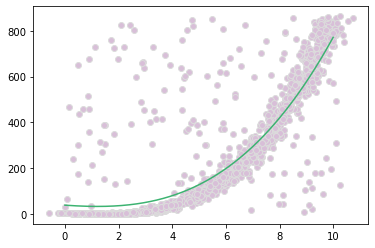

In [31]:
plt.scatter(X[:,1], y[:], color='thistle', edgecolors='gainsboro')
x = np.arange(0.0, 10.0, 0.01)
plt.plot(x,[p1(i,theta) for i in x ], color='mediumseagreen')
plt.show()

___
## Linearna regresija - drugačiji izbor funkcije pogreške
___

Kako se ponaša model linearne regresije kada imamo stršeće vrijednosti među podacima na kojima učimo?

In [32]:
def loss(y_prediction,y):
    return np.sum((y_prediction-y)**2)/(2*y.shape[0])

In [ ]:
xrange = np.arange(-3,3,0.001)
yrange = map(L,xrange)
plt.plot(xrange, list(yrange))
plt.show()

#### a)

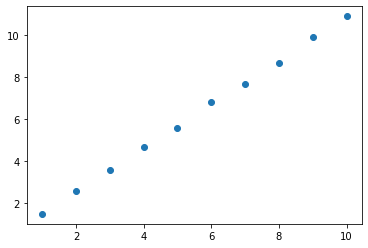

In [34]:
X_a = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)
y_a = np.array([1.5,2.6,3.6,4.7,5.6,6.8,7.7,8.7,9.9,10.9]).reshape(-1,1)
plt.scatter(X_a,y_a)

In [35]:
reg = LinearRegression().fit(X_a,y_a)
loss_a = loss(reg.predict(y_a), y_a)
print(loss_a)

0.2710741994490352


#### b)

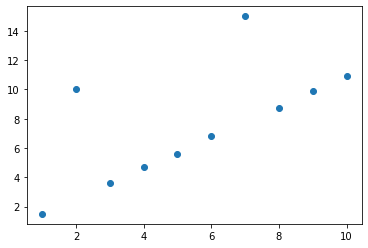

In [37]:
X_b = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)
y_b = np.array([1.5,10,3.6,4.7,5.6,6.8,15,8.7,9.9,10.9]).reshape(-1,1)
plt.scatter(X_b,y_b)

In [38]:
reg = LinearRegression().fit(X_b,y_b)
loss_b = loss(reg.predict(y_b), y_b)
print(loss_b)

1.8777200229568407


In [39]:
# Omjer gubitaka
loss_b/loss_a

6.926959580710195

### Huberova regresija
U statistici se koristi funkcija gubitka *Huber loss*, koja je robusnija na stršeće vrijednosti u odnosu na srednje kvadratno odstupanje. 
Funkcija troška se definira na sljedeći način: 
   $$ L_{\delta}(y,h_{\theta}(x)) = \begin{cases}
                            \frac{1}{2}(y-h_{\theta}(x))^2, \;za\; |y-h_{\theta}(x)| \leq \delta \\
                            \delta \cdot |y-h_{\theta}(x)| - \frac{1}{2}\delta ^2, \; inace
                            \end{cases} $$
                            

In [40]:
def L(a,delta=1):
    if abs(a) <= delta:
        return a**2
    else: 
        return delta*abs(a) - 0.5*(delta**2)

#### c)

In [41]:
huber = HuberRegressor().fit(X_a, y_a.reshape(-1))
loss_a_huber = loss(huber.predict(y_a), y_a)
print(loss_a_huber)

95.33835249851134


#### d)

In [42]:
huber = HuberRegressor().fit(X_b, y_b.reshape(-1,))
loss_b_huber = loss(huber.predict(y_b), y_b)
print(loss_b_huber)

153.53786064754985


In [43]:
# Omjer pogresaka
loss_b_huber / loss_a_huber

1.6104522117680529

### "*Veći primjer*"

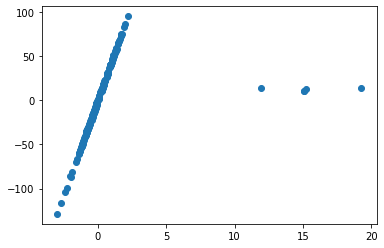

In [77]:
X_c, y_c = make_regression(n_samples = 200, n_features = 1, noise = 1)

X_c[:5] = rng.uniform(10, 20, (5, 1))
y_c[:5] = rng.uniform(10, 20, 5)

plt.scatter(X_c,y_c)
plt.show()

In [78]:
# Linearna regresija
reg_ = LinearRegression().fit(X_c.reshape(-1,1),y_c.reshape(-1,1))

loss_reg = loss(reg_.predict(y_c.reshape(-1,1)), y_c)


In [79]:
# Huber regresija

hub_ = HuberRegressor().fit(X_c,y_c)

loss_hub = loss(hub_.predict(y_c.reshape(-1,1)), y_c)


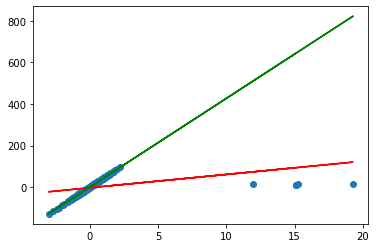

In [80]:
plt.scatter(X_c,y_c)
plt.plot(X_c, reg_.predict(X_c), color="red")
plt.plot(X_c, hub_.predict(X_c), color="green")